# Hi :)

----

# Line

In [1]:
from moviepy.video.VideoClip import VideoClip
from PIL import Image, ImageDraw
import numpy as np

def animate_lines(image_path, output_path, duration= 2):
    # Step 1: Load the image
    image= Image.open(image_path).convert("RGB")
    width, height= image.size
    base_frame= np.array(image)

    # Step 2: Define the frame generation function
    def make_frame(t):
        # Copy the base image to avoid overwriting
        frame= base_frame.copy()
        img= Image.fromarray(frame)
        draw= ImageDraw.Draw(img)
        
        # Line animation parameters
        x_start= 50
        x_end= int(500 + (t / duration) * (width - 100))  # Line grows over time
        y= height // 2

        # Draw the animated line
        draw.line((x_start, y, x_end, y), fill= "red", width= 5)

        # Return the frame as a NumPy array
        return np.array(img)

    # Step 3: Create the VideoClip using the frame function
    animation= VideoClip(make_frame, duration= duration)

    # Step 4: Write the animation to a video file
    animation.write_videofile(output_path, fps= 24)

# Example usage
input_image= "B.jpg"  # Replace with your image path
output_video= "Line.mp4"
animate_lines(input_image, output_video)

MoviePy - Building video Line.mp4.
MoviePy - Writing video Line.mp4



MoviePy - Done !
MoviePy - video ready Line.mp4


# Fixed line

In [2]:
from moviepy.video.VideoClip import VideoClip
from PIL import Image, ImageDraw
import numpy as np

def animate_lines_fixed_points(image_path, output_path, start_point, end_point, duration):
    # Step 1: Load the image
    image= Image.open(image_path).convert("RGB")
    base_frame= np.array(image)

    # Step 2: Define the frame generation function
    def make_frame(t):
        # Copy the base image to avoid overwriting
        frame= base_frame.copy()
        img= Image.fromarray(frame)
        draw= ImageDraw.Draw(img)

        # Interpolate the end point based on time
        x1, y1= start_point
        x2, y2= end_point

        # Compute the intermediate point for the animation
        current_x= int(x1 + (x2 - x1) * (t / duration))
        current_y= int(y1 + (y2 - y1) * (t / duration))

        # Draw the line from start_point to the interpolated point
        draw.line((x1, y1, current_x, current_y), fill= "red", width= 5)

        # Return the frame as a NumPy array
        return np.array(img)

    # Step 3: Create the VideoClip using the frame function
    animation= VideoClip(make_frame, duration= duration)

    # Step 4: Write the animation to a video file
    animation.write_videofile(output_path, fps= 24)

# Example usage
input_image= "B.jpg"  # Replace with your image path
output_video= "Fixed line.mp4"
start_point= (496, 564)  # Starting point of the line
end_point= (496, 138)   # Ending point of the line
animate_lines_fixed_points(input_image, output_video, start_point, end_point, duration= 2)

MoviePy - Building video Fixed line.mp4.
MoviePy - Writing video Fixed line.mp4



MoviePy - Done !
MoviePy - video ready Fixed line.mp4


# Sequential lines

In [3]:
from moviepy.video.VideoClip import VideoClip
from PIL import Image, ImageDraw
import numpy as np

def animate_sequential_lines(image_path, output_path, lines, duration):
    # Step 1: Load the image
    image= Image.open(image_path).convert("RGB")
    base_frame= np.array(image)

    # Step 2: Define the frame generation function
    def make_frame(t):
        # Copy the base image to avoid overwriting
        frame= base_frame.copy()
        img= Image.fromarray(frame)
        draw= ImageDraw.Draw(img)

        # Total time allocated to each line
        time_per_line= duration / len(lines)

        # Draw lines sequentially
        for i, (start_point, end_point) in enumerate(lines):
            # Determine the start and end times for the current line
            line_start_time= i * time_per_line
            line_end_time= (i + 1) * time_per_line

            # If we're within the time window for this line
            if line_start_time <= t < line_end_time:
                # Compute the interpolation progress for the current line
                progress= (t - line_start_time) / time_per_line
                x1, y1= start_point
                x2, y2= end_point

                # Compute the current drawing point
                current_x= int(x1 + (x2 - x1) * progress)
                current_y= int(y1 + (y2 - y1) * progress)

                # Draw the partial line
                draw.line((x1, y1, current_x, current_y), fill= "red", width= 5)

            # If we've passed the time for this line, draw it fully
            elif t >= line_end_time:
                x1, y1= start_point
                x2, y2= end_point
                draw.line((x1, y1, x2, y2), fill= "red", width= 5)

        # Return the frame as a NumPy array
        return np.array(img)

    # Step 3: Create the VideoClip using the frame function
    animation= VideoClip(make_frame, duration= duration)

    # Step 4: Write the animation to a video file
    animation.write_videofile(output_path, fps= 24)

# Example usage
input_image= "B.jpg"  # Replace with your image path
output_video= "Sequential lines.mp4"

# Define multiple lines with start and end points
lines= [
    ((496, 564), (496, 142)),  # Line 1
    ((496, 142), (674, 142)),  # Line 2
]
# Animate the lines sequentially
animate_sequential_lines(input_image, output_video, lines, duration= 4)

MoviePy - Building video Sequential lines.mp4.
MoviePy - Writing video Sequential lines.mp4



MoviePy - Done !
MoviePy - video ready Sequential lines.mp4


# Curve

In [31]:
from moviepy.video.VideoClip import VideoClip
from PIL import Image, ImageDraw
import numpy as np

def animate_curve(image_path, output_path, curve_points, duration=2):
    """
    Animates a curve being drawn on an image.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the output video.
        curve_points (list): List of (x, y) tuples representing the curve's path.
        duration (int): Duration of the animation in seconds.
    """
    # Step 1: Load the image
    image = Image.open(image_path).convert("RGB")
    base_frame = np.array(image)

    # Step 2: Define the frame generation function
    def make_frame(t):
        # Copy the base image to avoid overwriting
        frame = base_frame.copy()
        img = Image.fromarray(frame)
        draw = ImageDraw.Draw(img)

        # Determine how many points to draw based on time
        progress = t / duration  # Normalize time
        num_points = int(len(curve_points) * progress)

        # Draw the curve up to the current point
        if num_points > 1:
            draw.line(curve_points[:num_points], fill="red", width=5)

        # Return the frame as a NumPy array
        return np.array(img)

    # Step 3: Create the VideoClip using the frame function
    animation = VideoClip(make_frame, duration=duration)

    # Step 4: Write the animation to a video file
    animation.write_videofile(output_path, fps=24)

# Example usage
input_image = "B.jpg"  # Replace with your image path
output_video = "Curve.mp4"

# Define the curve as a list of (x, y) points
curve_points = [
]
def generate_arc(center, radius, start_point, end_point, num_points= 100):
    cx, cy= center
    # Calculate angles of the start and end points
    start_angle= np.arctan2(-(start_point[1] - cy), start_point[0] - cx)  # Angle in radians
    end_angle= np.arctan2(-(end_point[1] - cy), end_point[0] - cx)        # Angle in radians
    # Ensure the arc goes counter-clockwise
    if end_angle < start_angle:
        end_angle += 2 * np.pi
    # Generate angles along the arc
    angles= np.linspace(start_angle, end_angle, num_points)
    # Generate points from angles
    points= [
        (int(cx + radius * np.cos(theta)), int(cy - radius * np.sin(theta)))
        for theta in angles
    ]
    return points
center= (674, 200)  # Circle center
radius= 100 # Circle radius
start_point= (674, 142)  # Start point on the circle
end_point= (800, 200)    # End point on the circle
num_points= 100  # Number of points on the arc
arc_points= generate_arc(center, radius, start_point, end_point, num_points)
curve_points.extend(arc_points)

# Animate the curve
animate_curve(input_image, output_video, curve_points)

                                                                     
                                                                     
frame_index:   4%|▍         | 2/48 [09:26<00:07,  6.01it/s, now=None]

MoviePy - Building video Curve.mp4.
MoviePy - Writing video Curve.mp4
























                                                                     
                                                                     
frame_index:   4%|▍         | 2/48 [09:30<00:07,  6.01it/s, now=None]

MoviePy - Done !
MoviePy - video ready Curve.mp4


# B

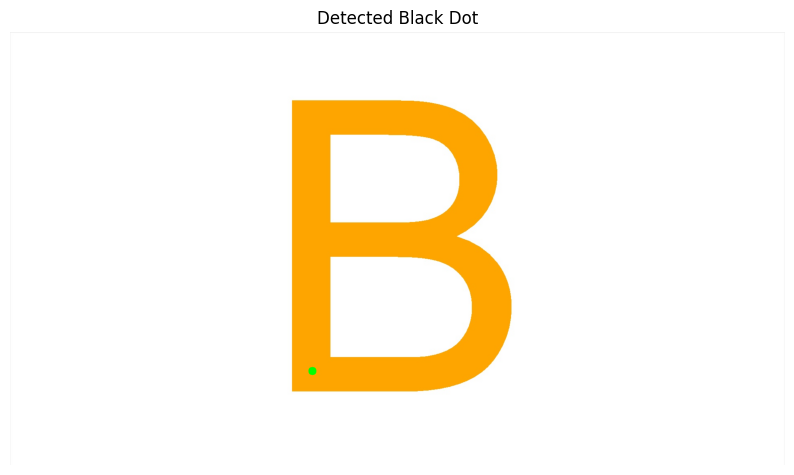

Black dot detected at coordinates: (748, 838)


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_black_dot(image_path):
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to detect dark areas
    _, binary= cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)  # Adjusted threshold for dark areas
    
    # Find contours
    contours, _= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    detected_dot= None
    output_image= image.copy()
    
    for contour in contours:
        area= cv2.contourArea(contour)
        if 10 < area < 500:  # Filter small regions (10 < area < 500 is fine-tuned for the dot)
            # Compute the centroid of the contour
            M= cv2.moments(contour)
            if M["m00"] != 0:
                cx= int(M["m10"] / M["m00"])
                cy= int(M["m01"] / M["m00"])
                detected_dot= (cx, cy)
                # Mark the detected dot
                cv2.circle(output_image, (cx, cy), 10, (0, 255, 0), -1)
                break
    
    # Show the processed image with detected dot
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Black Dot")
    plt.axis("off")
    plt.show()
    
    return detected_dot

# Provide the path to your image
image_path= "B.jpg"
black_dot_coordinates= detect_black_dot(image_path)

if black_dot_coordinates:
    print(f"Black dot detected at coordinates: {black_dot_coordinates}")
else:
    print("Black dot could not be detected.")

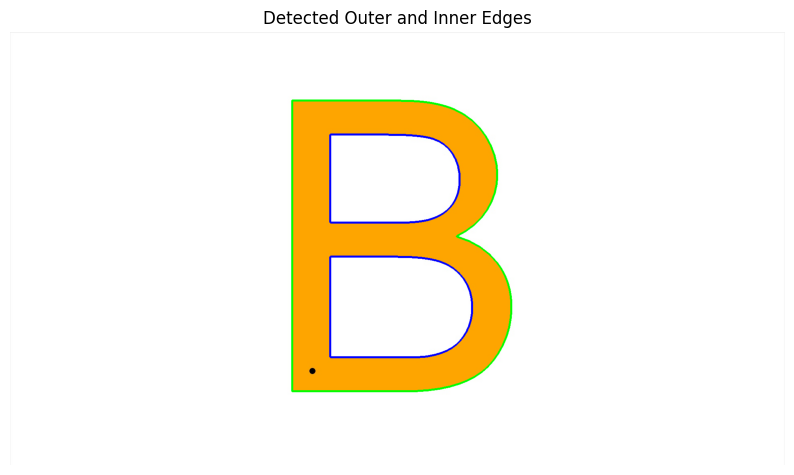

Outer edge detected.
Inner edge detected.


In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image_path):
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to segment the orange pattern
    _, binary= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)  # Adjust threshold to segment orange
    
    # Find contours
    contours, hierarchy= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    output_image= image.copy()
    edges= {"outer_edge": None, "inner_edge": None}

    for i, contour in enumerate(contours):
        area= cv2.contourArea(contour)
        if area > 1000:  # Filter out smaller areas
            # Determine if it's the outer or inner edge based on hierarchy
            if hierarchy[0][i][3] == -1:  # Outer edge has no parent
                edges["outer_edge"]= contour
                cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 3)  # Green for outer edge
            else:  # Inner edge has a parent
                edges["inner_edge"]= contour
                cv2.drawContours(output_image, [contour], -1, (255, 0, 0), 3)  # Blue for inner edge

    # Show the processed image with detected edges
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Outer and Inner Edges")
    plt.axis("off")
    plt.show()
    
    return edges

# Provide the path to your image
image_path= "B.jpg"
edges= detect_edges(image_path)

if edges["outer_edge"] is not None:
    print("Outer edge detected.")
else:
    print("Outer edge not detected.")
    
if edges["inner_edge"] is not None:
    print("Inner edge detected.")
else:
    print("Inner edge not detected.")

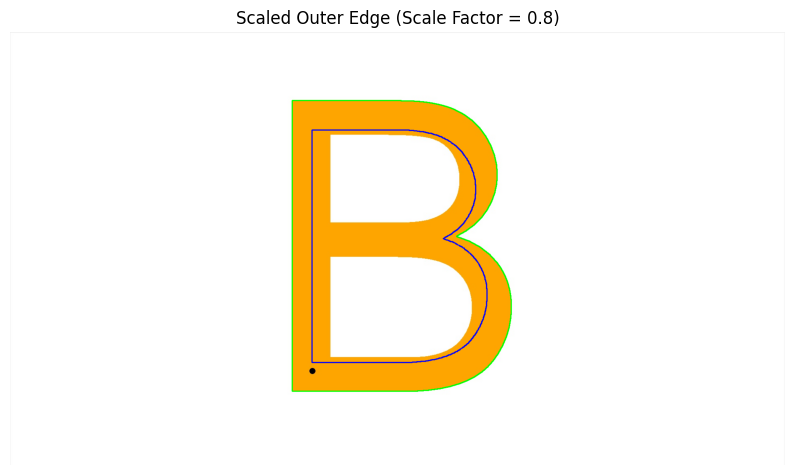

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_outer_edge(image_path, scale_factor):  # Scale factor set to 0.88
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to segment the orange pattern
    _, binary= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    output_image= image.copy()
    outer_edge= None

    # Detect the outer edge (the largest contour without a parent in hierarchy)
    for i, contour in enumerate(contours):
        if hierarchy[0][i][3] == -1:  # Outer edge has no parent
            outer_edge= contour
            break  # Assuming there's only one main outer edge

    if outer_edge is None:
        print("Outer edge not detected.")
        return
    
    # Find the centroid of the outer edge (center of the contour)
    M= cv2.moments(outer_edge)
    if M["m00"] != 0:
        cx= int(M["m10"] / M["m00"])
        cy= int(M["m01"] / M["m00"])
    else:
        cx, cy= 0, 0

    center= np.array([cx, cy])

    # Scale the outer edge
    scaled_outer_edge= []
    for point in outer_edge:
        vector_to_center= point[0] - center
        scaled_point= center + vector_to_center * scale_factor
        scaled_outer_edge.append(scaled_point.astype(np.int32))

    scaled_outer_edge= np.array(scaled_outer_edge, dtype= np.int32)

    # Draw the original and scaled outer edge
    cv2.drawContours(output_image, [outer_edge], -1, (0, 255, 0), 2)  # Original outer edge in green
    cv2.polylines(output_image, [scaled_outer_edge], isClosed= True, color= (255, 0, 0), thickness= 2)  # Scaled outer edge in blue

    # Show the processed image
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Scaled Outer Edge (Scale Factor = {scale_factor})")
    plt.axis("off")
    plt.show()

# Provide the path to your image
image_path= "B.jpg"
scale_outer_edge(image_path, scale_factor= 0.8)

# Circle

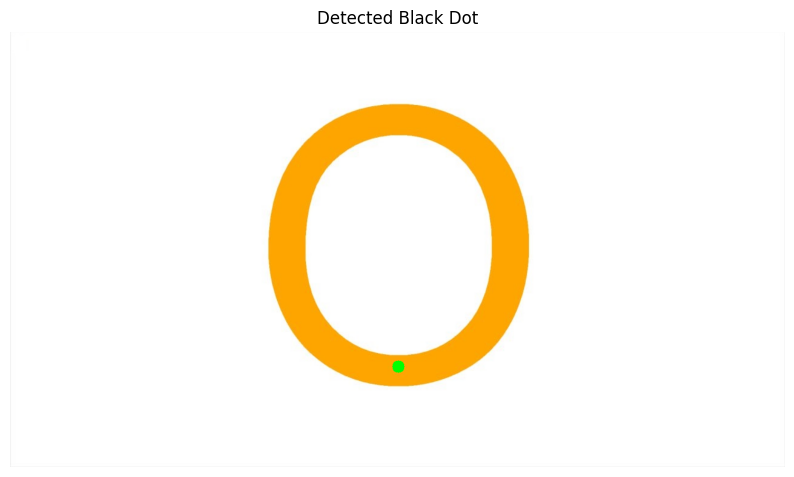

Black dot detected at coordinates: (641, 553)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_black_dot(image_path):
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to detect dark areas
    _, binary= cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)  # Adjusted threshold for dark areas
    
    # Find contours
    contours, _= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    detected_dot= None
    output_image= image.copy()
    
    for contour in contours:
        area= cv2.contourArea(contour)
        if 10 < area < 500:  # Filter small regions (10 < area < 500 is fine-tuned for the dot)
            # Compute the centroid of the contour
            M= cv2.moments(contour)
            if M["m00"] != 0:
                cx= int(M["m10"] / M["m00"])
                cy= int(M["m01"] / M["m00"])
                detected_dot= (cx, cy)
                # Mark the detected dot
                cv2.circle(output_image, (cx, cy), 10, (0, 255, 0), -1)
                break
    
    # Show the processed image with detected dot
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Black Dot")
    plt.axis("off")
    plt.show()
    
    return detected_dot

# Provide the path to your image
image_path= "Circle.jpg"
black_dot_coordinates= detect_black_dot(image_path)

if black_dot_coordinates:
    print(f"Black dot detected at coordinates: {black_dot_coordinates}")
else:
    print("Black dot could not be detected.")

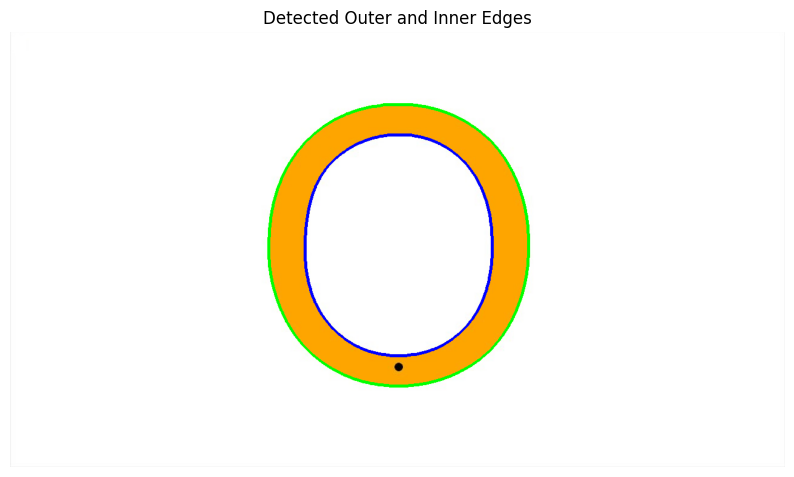

Outer edge detected.
Inner edge detected.


In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_edges(image_path):
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to segment the orange pattern
    _, binary= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)  # Adjust threshold to segment orange
    
    # Find contours
    contours, hierarchy= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    output_image= image.copy()
    edges= {"outer_edge": None, "inner_edge": None}

    for i, contour in enumerate(contours):
        area= cv2.contourArea(contour)
        if area > 1000:  # Filter out smaller areas
            # Determine if it's the outer or inner edge based on hierarchy
            if hierarchy[0][i][3] == -1:  # Outer edge has no parent
                edges["outer_edge"]= contour
                cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 3)  # Green for outer edge
            else:  # Inner edge has a parent
                edges["inner_edge"]= contour
                cv2.drawContours(output_image, [contour], -1, (255, 0, 0), 3)  # Blue for inner edge

    # Show the processed image with detected edges
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Outer and Inner Edges")
    plt.axis("off")
    plt.show()
    
    return edges

# Provide the path to your image
image_path= "Circle.jpg"
edges= detect_edges(image_path)

if edges["outer_edge"] is not None:
    print("Outer edge detected.")
else:
    print("Outer edge not detected.")
    
if edges["inner_edge"] is not None:
    print("Inner edge detected.")
else:
    print("Inner edge not detected.")

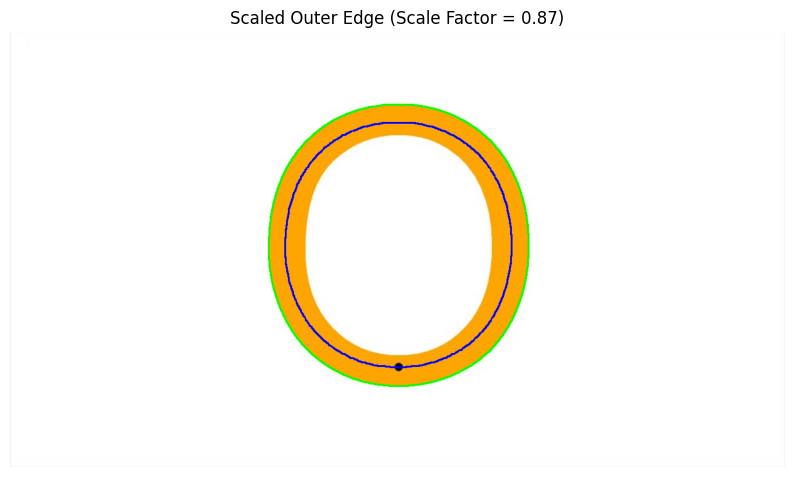

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_outer_edge(image_path, scale_factor):  # Scale factor set to 0.88
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a binary threshold to segment the orange pattern
    _, binary= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, hierarchy= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    output_image= image.copy()
    outer_edge= None

    # Detect the outer edge (the largest contour without a parent in hierarchy)
    for i, contour in enumerate(contours):
        if hierarchy[0][i][3] == -1:  # Outer edge has no parent
            outer_edge= contour
            break  # Assuming there's only one main outer edge

    if outer_edge is None:
        print("Outer edge not detected.")
        return
    
    # Find the centroid of the outer edge (center of the contour)
    M= cv2.moments(outer_edge)
    if M["m00"] != 0:
        cx= int(M["m10"] / M["m00"])
        cy= int(M["m01"] / M["m00"])
    else:
        cx, cy= 0, 0

    center= np.array([cx, cy])

    # Scale the outer edge
    scaled_outer_edge= []
    for point in outer_edge:
        vector_to_center= point[0] - center
        scaled_point= center + vector_to_center * scale_factor
        scaled_outer_edge.append(scaled_point.astype(np.int32))

    scaled_outer_edge= np.array(scaled_outer_edge, dtype= np.int32)

    # Draw the original and scaled outer edge
    cv2.drawContours(output_image, [outer_edge], -1, (0, 255, 0), 2)  # Original outer edge in green
    cv2.polylines(output_image, [scaled_outer_edge], isClosed= True, color= (255, 0, 0), thickness= 2)  # Scaled outer edge in blue

    # Show the processed image
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Scaled Outer Edge (Scale Factor = {scale_factor})")
    plt.axis("off")
    plt.show()

# Provide the path to your image
image_path= "Circle.jpg"
scale_outer_edge(image_path, scale_factor= 0.87)

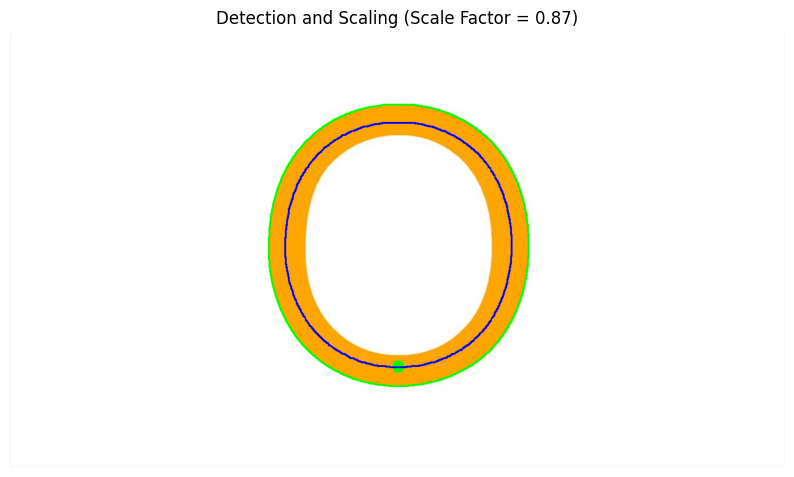

Black dot detected at coordinates: (641, 553)


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_scale(image_path, scale_factor):
    # Load the image
    image= cv2.imread(image_path)
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Step 1: Detect the black dot
    # Apply a binary threshold to detect dark areas
    _, binary_dot= cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)
    # Find contours for the black dot
    contours_dot, _= cv2.findContours(binary_dot, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detected_dot= None
    output_image= image.copy()
    for contour in contours_dot:
        area= cv2.contourArea(contour)
        if 10 < area < 500:  # Filter small regions
            # Compute the centroid of the contour
            M= cv2.moments(contour)
            if M["m00"] != 0:
                cx= int(M["m10"] / M["m00"])
                cy= int(M["m01"] / M["m00"])
                detected_dot= (cx, cy)
                # Mark the detected dot
                cv2.circle(output_image, (cx, cy), 10, (0, 255, 0), -1)
                break
    # Step 2: Scale the outer edge
    # Apply a binary threshold to segment the outer edge
    _, binary_edge= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    # Find contours for the outer edge
    contours_edge, hierarchy= cv2.findContours(binary_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    outer_edge= None
    # Detect the outer edge (largest contour without a parent in hierarchy)
    for i, contour in enumerate(contours_edge):
        if hierarchy[0][i][3] == -1:  # Outer edge has no parent
            outer_edge= contour
            break
    if outer_edge is not None:
        # Find the centroid of the outer edge (center of the contour)
        M= cv2.moments(outer_edge)
        if M["m00"] != 0:
            cx= int(M["m10"] / M["m00"])
            cy= int(M["m01"] / M["m00"])
        else:
            cx, cy= 0, 0
        center= np.array([cx, cy])
        # Scale the outer edge
        scaled_outer_edge= []
        for point in outer_edge:
            vector_to_center= point[0] - center
            scaled_point= center + vector_to_center * scale_factor
            scaled_outer_edge.append(scaled_point.astype(np.int32))
        scaled_outer_edge= np.array(scaled_outer_edge, dtype=np.int32)
        # Draw the original and scaled outer edge
        cv2.drawContours(output_image, [outer_edge], -1, (0, 255, 0), 2)  # Original outer edge in green
        cv2.polylines(output_image, [scaled_outer_edge], isClosed= True, color= (255, 0, 0), thickness= 2)  # Scaled edge in blue
    # Display the processed image
    plt.figure(figsize= (10, 6))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detection and Scaling (Scale Factor = {scale_factor})")
    plt.axis("off")
    plt.show()
    # Print the result
    if detected_dot:
        print(f"Black dot detected at coordinates: {detected_dot}")
    else:
        print("Black dot could not be detected.")

# Test the function
image_path= "Circle.jpg"  # Replace with the path to your image
detect_and_scale(image_path, scale_factor= 0.87)

In [100]:
import cv2
import numpy as np
from moviepy.video.VideoClip import VideoClip
from PIL import Image, ImageDraw

def image_to_video(image_path, output_video_path, scale_factor, duration):
    def detect_and_scale(image_path, scale_factor):
        # Load the image
        image= cv2.imread(image_path)
        gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Detect the black dot
        _, binary_dot= cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)
        contours_dot, _= cv2.findContours(binary_dot, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        detected_dot= None
        for contour in contours_dot:
            area= cv2.contourArea(contour)
            if 10 < area < 500:  # Filter small regions
                M= cv2.moments(contour)
                if M["m00"] != 0:
                    cx= int(M["m10"] / M["m00"])
                    cy= int(M["m01"] / M["m00"])
                    detected_dot= (cx, cy)
                    break
        # Detect the outer edge
        _, binary_edge= cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
        contours_edge, hierarchy= cv2.findContours(binary_edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        outer_edge= None
        for i, contour in enumerate(contours_edge):
            if hierarchy[0][i][3] == -1:  # Outer edge has no parent
                outer_edge= contour
                break
        # Scale the outer edge
        scaled_outer_edge= []
        if outer_edge is not None:
            M= cv2.moments(outer_edge)
            cx= int(M["m10"] / M["m00"]) if M["m00"] != 0 else 0
            cy= int(M["m01"] / M["m00"]) if M["m00"] != 0 else 0
            center= np.array([cx, cy])
            for point in outer_edge:
                vector_to_center= point[0] - center
                scaled_point= center + vector_to_center * scale_factor
                scaled_outer_edge.append(scaled_point.astype(np.int32))
            scaled_outer_edge= np.array(scaled_outer_edge, dtype= np.int32)
        return scaled_outer_edge, detected_dot
    def animate_sequential_lines(image_path, output_path, scaled_path, duration):
        image= Image.open(image_path).convert("RGB")
        base_frame= np.array(image)
        def make_frame(t):
            frame= base_frame.copy()
            img= Image.fromarray(frame)
            draw= ImageDraw.Draw(img)
            time_per_line= duration / len(scaled_path)
            for i, point in enumerate(scaled_path[ : -1]):
                start_point= point
                end_point= scaled_path[i + 1]
                line_start_time= i * time_per_line
                line_end_time= (i + 1) * time_per_line
                if line_start_time <= t < line_end_time:
                    progress= (t - line_start_time) / time_per_line
                    x1, y1= start_point
                    x2, y2= end_point
                    current_x= int(x1 + (x2 - x1) * progress)
                    current_y= int(y1 + (y2 - y1) * progress)
                    draw.line((x1, y1, current_x, current_y), fill= "red", width= 4)
                elif t >= line_end_time:
                    x1, y1= start_point
                    x2, y2= end_point
                    draw.line((x1, y1, x2, y2), fill= "red", width= 5)
            return np.array(img)
        animation= VideoClip(make_frame, duration= duration)
        animation.write_videofile(output_path, fps= 24)
    # Detect and scale
    scaled_path, detected_dot= detect_and_scale(image_path, scale_factor)
    if detected_dot is None or len(scaled_path) == 0:
        raise ValueError("Failed to detect required features in the image.")
    # Transform the scaled path
    target= np.array([detected_dot[0], detected_dot[1]])
    distances= np.linalg.norm(scaled_path - target, axis= 1)
    closest_idx= np.argmin(distances)
    before_closest= scaled_path[:closest_idx]
    after_closest= scaled_path[closest_idx + 1:]
    result= np.vstack((scaled_path[closest_idx : closest_idx + 1], np.flip(before_closest, axis= 0), np.flip(after_closest, axis= 0)))    
    # Cut and append elements
    n= 4
    if len(result) > n:
        first_n= result[:n]
        remaining= result[n:]
        result= np.vstack((remaining, first_n))
    # Animate the lines
    animate_sequential_lines(image_path, output_video_path, result, duration)

# # Example usage
# input_image= "Circle.jpg"  # Replace with the path to your image
# output_video= "output_animation.mp4"
# image_to_video(input_image, output_video, scale_factor= 0.87, duration= 4)